# MACHINE LEARNING ASSIGNMENTS

## INTERMEDIATE QUESTIONS :

### Q-1. Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df=pd.read_csv(r"C:\Users\user\Downloads\archive (1)\instagram_reach.csv")

In [3]:
df.sample()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
90,3,13,the_ios_developer,4K Ai,863,#developer #coding #programmer #javascript #pr...,2 hours,32


In [5]:
# Step 1: Data Preprocessing
df.shape

(100, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.sample(5)

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
42,11,hollympeck,Still on set. 🙃 Can't tell you what it's for!,273,#artificialintelligence,2 hours,41
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
59,28,mikequindazzi,8.5 billion more #smartphones by 2021 will hel...,4496,#DeepLearning #MachineLearning#ArtificialIntel...,2 hours,11
75,7,rare.planet,Our most selling hand painted kettle!! Order t...,2573,#rareplanet #shopatrareplanet #India#indiangoo...,2 hours,119
88,10,brad_0611,"Living in Texas is easy, even if your standard...",1158,#frisco#dallas #dfw #texas #newconstruction#ec...,2 hours,29


In [9]:
df.isnull().sum()

S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
# Step 2: Feature Engineering 
df['Caption Length'] = df['Caption'].astype(str).apply(len)
df['Hashtag Count'] = df['Hashtags'].astype(str).apply(lambda x: len(x.split()))

In [12]:
df.sample(1)

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,Caption Length,Hashtag Count
37,22,_linda_smith567,Hello ......You could see the excitement in he...,124,#любовь #gm #sme #smenigeria #profits#business...,2 hours,24,153,21


In [16]:
# Convert "Time since posted" to numeric representation (hours)
from datetime import datetime
current_time = datetime.now()

def convert_time(time_str):
    hours_str = time_str.split()[0]
    hours = int(hours_str)
    return hours

df['Time Since Posted (hours)'] = df['Time since posted'].apply(convert_time)

# Calculate the time since posted based on the current time
df['Time Since Posted (hours)'] = df['Time Since Posted (hours)'].apply(lambda x: (current_time.hour - x + 24) % 24)

In [ ]:
def extract_time(time_str):
    time_value = re.findall(r'\d+', time_str)
    return int(time_value[0]) if time_value else 0

df['Time Since Posted (hours)'] = df['Time since posted'].apply(extract_time)

In [18]:
df.sample(1)

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,Caption Length,Hashtag Count,Time Since Posted (hours)
93,17,benasdzimidas,60% off Lux Light until Monday! Get your copy ...,179,#android #design #development#benasdzimidas #g...,2 hours,20,75,22,7


In [19]:
# Step 3: Split the Data
X = df[['Followers', 'Caption Length', 'Hashtag Count']]
y_likes = df['Likes']
y_time_since_posted = df['Time Since Posted (hours)']

X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(
    X, y_likes, y_time_since_posted, test_size=0.2, random_state=42
)

In [20]:
X_train

,Followers,Caption Length,Hashtag Count
55,3448,255,10
88,1158,65,7
26,265,44,26
42,273,45,1
69,1003,369,23
...,...,...,...
60,145,137,7
71,383,12,20
14,2904,31,14
92,106,270,4


In [21]:
X_test.head()

,Followers,Caption Length,Hashtag Count
83,91,353,17
53,87,28,13
70,1200,29,8
45,122,131,7
44,118,72,7


In [22]:
y_likes_train

55    349
88     29
26     25
42     41
69     40
     ... 
60     16
71     50
14     28
92     12
51    157
Name: Likes, Length: 80, dtype: int64

In [23]:
y_likes_test

83     14
53     24
70     21
45     31
44     16
39    136
22     20
80     28
10     31
0     139
18     30
30     90
73     10
33     30
90     32
4      30
76     11
77     55
12     80
31     19
Name: Likes, dtype: int64

In [24]:
y_time_train

55    9
88    7
26    7
42    7
69    7
     ..
60    7
71    7
14    6
92    7
51    5
Name: Time Since Posted (hours), Length: 80, dtype: int64

In [25]:
y_time_test

83     6
53     5
70     7
45     7
44     7
39    19
22     7
80     7
10     2
0     22
18     5
30     7
73     7
33     7
90     7
4      6
76     7
77     7
12     0
31     7
Name: Time Since Posted (hours), dtype: int64

In [26]:
# Step 4: Model Selection
likes_model = LinearRegression()
time_model = LinearRegression()

In [27]:
# Step 5: Model Training 
regressor_likes = LinearRegression()
regressor_likes.fit(X_train, y_likes_train)
y_likes_pred = regressor_likes.predict(X_test)


regressor_time = LinearRegression()
regressor_time.fit(X_train, y_time_train)
y_time_pred = regressor_time.predict(X_test)

In [29]:
# Step :6 Model Evaluation with Model Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid = {'alpha': [0.1, 1.0, 10.0]}  # Define the range of alpha values to try
ridge_likes = Ridge()
grid_search_likes = GridSearchCV(ridge_likes, param_grid)
grid_search_likes.fit(X_train, y_likes_train)
best_likes_model = grid_search_likes.best_estimator_
y_likes_pred = best_likes_model.predict(X_test)

ridge_time = Ridge()
grid_search_time = GridSearchCV(ridge_time, param_grid)
grid_search_time.fit(X_train, y_time_train)
best_time_model = grid_search_time.best_estimator_
y_time_pred = best_time_model.predict(X_test)

In [30]:
# Step 7: Model tuning
likes_mse = mean_squared_error(y_likes_test, y_likes_pred)
likes_mae = mean_absolute_error(y_likes_test, y_likes_pred)
time_mse = mean_squared_error(y_time_test, y_time_pred)
time_mae = mean_absolute_error(y_time_test, y_time_pred)

print("Best Likes Model:", best_likes_model)
print("Best Time Model:", best_time_model)
print("Likes - Mean Squared Error:", likes_mse)
print("Likes - Mean Absolute Error:", likes_mae)
print("Time Since Posted - Mean Squared Error:", time_mse)
print("Time Since Posted - Mean Absolute Error:", time_mae)

Best Likes Model: Ridge(alpha=10.0)
Best Time Model: Ridge(alpha=10.0)
Likes - Mean Squared Error: 1151.7876953782547
Likes - Mean Absolute Error: 25.710474136533016
Time Since Posted - Mean Squared Error: 23.710843876797902
Time Since Posted - Mean Absolute Error: 2.4265591711852137


In [31]:
# Step 8: Model Deployment
new_data = pd.DataFrame({'Followers': [1000], 'Caption Length': [120], 'Hashtag Count': [5]})
likes_prediction = best_likes_model.predict(new_data)

print("Likes prediction:", likes_prediction)

Likes prediction: [52.03119712]


In [32]:
# Step 8: Model Deployment
new_data = pd.DataFrame({'Followers': [100], 'Caption Length': [120], 'Hashtag Count': [5]})
likes_prediction = best_likes_model.predict(new_data)

print("Likes prediction:", likes_prediction)

Likes prediction: [40.04436681]


### Q-2. Imagine you have a dataset where you have different features like Age , Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using any 4 different classification algorithms. Now you have to build a model which can classify people into different classes.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [34]:
df1=pd.read_csv(r"C:\Users\user\Downloads\archive (1)\ObesityDataSet_raw_and_data_sinthetic.csv")

In [35]:
df1

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [36]:
df1.shape

(2111, 17)

In [37]:
df1.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [38]:
df1.duplicated().sum()

24

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [40]:
# Separate features (X) and target variable (y)
X = df1.drop("NObeyesdad", axis=1)
y = df1["NObeyesdad"]

In [41]:
# Perform label encoding for categorical features
le = LabelEncoder()
X["Gender"] = le.fit_transform(X["Gender"])
X["family_history_with_overweight"] = le.fit_transform(X["family_history_with_overweight"])
X["FAVC"] = le.fit_transform(X["FAVC"])
X["CAEC"] = le.fit_transform(X["CAEC"])
X["SMOKE"] = le.fit_transform(X["SMOKE"])
X["SCC"] = le.fit_transform(X["SCC"])
X["CALC"] = le.fit_transform(X["CALC"])
X["MTRANS"] = le.fit_transform(X["MTRANS"])

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
numerical_features = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [44]:
# Initialize the classifiers
logreg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()

In [45]:
# Fit the models on the training data
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

In [46]:
# Make predictions on the test data
logreg_pred = logreg.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test)

In [47]:
# Evaluate the performance of the models
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Support Vector Machine Accuracy:", accuracy_score(y_test, svm_pred))

Logistic Regression Accuracy: 0.8747044917257684
Decision Tree Accuracy: 0.9408983451536643
Random Forest Accuracy: 0.9574468085106383
Support Vector Machine Accuracy: 0.91725768321513


### Q-3. Imagine you have a dataset where you have different categories of data, Now you need to find the most similar data to the given data by using any 4 different similarity algorithms. Now you have to build a model which can find the most similar data to the given data

In [51]:
df2=pd.read_json(r"C:\Users\user\Downloads\archive (2)\News_Category_Dataset_v3.json",lines=True)

In [52]:
df2

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [53]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import jaccard_score
import Levenshtein

In [54]:
# Select the relevant columns for similarity calculation
selected_columns = ['headline', 'category', 'short_description']

In [55]:
# Preprocess the text data
text_data = df2[selected_columns].apply(lambda x: ' '.join(x), axis=1)

In [56]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [57]:
# Vectorize the text data
text_vectors = vectorizer.fit_transform(text_data)

In [58]:
# Select a data point for similarity comparison (e.g., the first data point)
query_data = text_data.iloc[0]
query_vector = vectorizer.transform([query_data])

In [59]:
# Calculate cosine similarity
cosine_similarities = cosine_similarity(query_vector, text_vectors).flatten()

In [60]:
# Calculate Jaccard similarity
jaccard_similarities = []
for text in text_data:
    intersection = set(query_data.split()).intersection(text.split())
    union = set(query_data.split()).union(text.split())
    similarity = len(intersection) / len(union)
    jaccard_similarities.append(similarity)

In [61]:
# Calculate Levenshtein distance
levenshtein_distances = []
for text in text_data:
    levenshtein_distances.append(Levenshtein.distance(query_data, text))

In [62]:

# Create a DataFrame to store the similarity results
similarity_df2 = pd.DataFrame({
    'Cosine Similarity': cosine_similarities,
    'Jaccard Similarity': jaccard_similarities,
    'Levenshtein Distance': levenshtein_distances
})


In [63]:
# Find the most similar data point based on each similarity algorithm
most_similar_cosine = similarity_df2['Cosine Similarity'].idxmax()
most_similar_jaccard = similarity_df2['Jaccard Similarity'].idxmax()
most_similar_levenshtein = similarity_df2['Levenshtein Distance'].idxmin()

# Print the most similar data points
print("Most similar data (Cosine Similarity):")
print(df2.loc[most_similar_cosine])

print("Most similar data (Jaccard Similarity):")
print(df2.loc[most_similar_jaccard])

print("Most similar data (Levenshtein Distance):")
print(df2.loc[most_similar_levenshtein])

Most similar data (Cosine Similarity):
link                 https://www.huffpost.com/entry/covid-boosters-...
headline             Over 4 Million Americans Roll Up Sleeves For O...
category                                                     U.S. NEWS
short_description    Health experts said it is too early to predict...
authors                                           Carla K. Johnson, AP
date                                               2022-09-23 00:00:00
Name: 0, dtype: object
Most similar data (Jaccard Similarity):
link                 https://www.huffpost.com/entry/covid-boosters-...
headline             Over 4 Million Americans Roll Up Sleeves For O...
category                                                     U.S. NEWS
short_description    Health experts said it is too early to predict...
authors                                           Carla K. Johnson, AP
date                                               2022-09-23 00:00:00
Name: 0, dtype: object
Most similar data (Leve

### Q4:-Imagine you working as a sale manager now you need to predict the Revenue and whether that particular revenue is on the weekend or not and find the Informational_Duration using the Ensemble learning algorithm

In [159]:
df4=pd.read_csv(r"C:\Users\user\Downloads\archive (3)\online_shoppers_intention.csv")

In [162]:
df4.sample(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
7529,0,0.000,0,0.0,48,3177.366667,0.008511,0.044681,0.0,0.0,Jul,2,2,5,1,Returning_Visitor,False,False
8585,11,194.575,0,0.0,81,2126.077501,0.011728,0.021291,0.0,0.0,Nov,3,2,1,2,Returning_Visitor,True,False


In [161]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [164]:
# Encode categorical features
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
df_encoded = pd.get_dummies(df4, columns=categorical_features, drop_first=True)

In [165]:
# Separate the target variables
X = df_encoded.drop(['Revenue', 'Informational_Duration'], axis=1)
y_revenue = df_encoded['Revenue']
y_weekend = df_encoded['Weekend']
informational_duration = df_encoded['Informational_Duration']

In [166]:
# Split the data into training and testing sets
X_train, X_test, y_revenue_train, y_revenue_test, y_weekend_train, y_weekend_test, \
informational_duration_train, informational_duration_test = train_test_split(X, y_revenue, y_weekend, informational_duration, test_size=0.2, random_state=42)

In [167]:
# Train the ensemble models for Revenue and Weekend
revenue_model = RandomForestClassifier(n_estimators=100)
revenue_model.fit(X_train, y_revenue_train)

RandomForestClassifier()

In [168]:
weekend_model = RandomForestClassifier(n_estimators=100)
weekend_model.fit(X_train, y_weekend_train)

RandomForestClassifier()

In [169]:
# Predict Revenue and Weekend on the test set
y_revenue_pred = revenue_model.predict(X_test)
y_weekend_pred = weekend_model.predict(X_test)

In [170]:
# Evaluate the performance of Revenue and Weekend models
revenue_accuracy = accuracy_score(y_revenue_test, y_revenue_pred)
weekend_accuracy = accuracy_score(y_weekend_test, y_weekend_pred)

In [171]:
print("Revenue Model Accuracy:", revenue_accuracy)
print("Weekend Model Accuracy:", weekend_accuracy)

Revenue Model Accuracy: 0.8921330089213301
Weekend Model Accuracy: 1.0


In [172]:
# Train the regression model for Informational_Duration
duration_model = RandomForestRegressor(n_estimators=100)
duration_model.fit(X_train, informational_duration_train)

RandomForestRegressor()

In [173]:
# Predict Informational_Duration on the test set
informational_duration_pred = duration_model.predict(X_test)

In [174]:
# Evaluate the performance of Informational_Duration model
duration_error = abs(informational_duration_test - informational_duration_pred)
average_duration_error = duration_error.mean()

print("Average Informational_Duration Error:", average_duration_error)

Average Informational_Duration Error: 30.99280865908264


### Q-5. Uber is a taxi service provider as we know, we need to predict the high booking area using an Unsupervised algorithm and price for the location using a supervised algorithm and use some map function to display the data

In [175]:
df5=pd.read_csv(r"C:\Users\user\Downloads\archive (4)\rideshare_kaggle.csv")

In [176]:
df5.sample(1)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
348314,a328d66c-f3eb-4c98-8a43-feb06a015823,1.543835e+09,10,3,12,2018-12-03 10:57:58,America/New_York,Northeastern University,Theatre District,Uber,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.2,1543852800


In [177]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import folium

In [178]:
df5.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [181]:
# Step 1: Preprocess the data
data = df5[['latitude', 'longitude', 'price']]

In [182]:
# Handle missing values if necessary
data.dropna(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16164\1906223165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [183]:
# Step 2: Unsupervised algorithm for predicting high booking areas
# Select relevant features for clustering
features = data[['latitude', 'longitude']]

In [184]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(features)

In [185]:
# Add cluster labels to the DataFrame
data['cluster'] = clusters

C:\Users\user\AppData\Local\Temp\ipykernel_16164\481698210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = clusters


In [186]:
# Step 3: Supervised algorithm for predicting location prices
# Prepare the data for supervised learning
X = data[['latitude', 'longitude', 'cluster']]
y = data['price']

In [187]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
# Choose a regression algorithm
regression_model = LinearRegression()

In [189]:
# Train the regression model
regression_model.fit(X_train, y_train)

LinearRegression()

In [190]:
# Make predictions on the testing set
y_pred = regression_model.predict(X_test)

In [191]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 87.18056566698783


In [192]:
# Visualization on a map
map_data = data[['latitude', 'longitude', 'price']]
map_data['cluster'] = clusters

In [194]:
# Create a map centered on the mean latitude and longitude
map_center = [map_data['latitude'].mean(), map_data['longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=12)

In [106]:
# Add markers to the map for each data point
for index, row in map_data.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Price: ${row['price']}").add_to(map)

# Display the map
map.save('booking_areas_map.html')

### Q6 and Q7 
I'm unable to provide answers to these questions.

### Q-8. Quora question pair similarity, you need to find the Similarity between two questions by mapping the words in the questions using TF-IDF, and using a supervised Algorithm you need to find the similarity between the questions.

In [195]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
df8 = pd.read_csv(r'C:\Users\user\Downloads\train.csv\train.csv')


# Handle missing values
df8['question1'].fillna('', inplace=True)
df8['question2'].fillna('', inplace=True)


# Preprocess the text data
def preprocess(text):
    # Convert to lowercase and remove punctuation
    text = str(text).lower()
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    return text


df8['question1'] = df8['question1'].apply(preprocess)
df8['question2'] = df8['question2'].apply(preprocess)

# Split the dataset into training and test sets
X = df8[['question1', 'question2']]
y = df8['is_duplicate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Compute TF-IDF representation
X_train_tfidf = vectorizer.fit_transform(X_train['question1'] + ' ' + X_train['question2'])
X_test_tfidf = vectorizer.transform(X_test['question1'] + ' ' + X_test['question2'])

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7517376140888966
              precision    recall  f1-score   support

           0       0.76      0.88      0.82     50803
           1       0.73      0.53      0.61     30055

    accuracy                           0.75     80858
   macro avg       0.74      0.71      0.72     80858
weighted avg       0.75      0.75      0.74     80858



In [196]:
# Compute cosine similarity between question pairs in batches
batch_size = 1000
num_samples = df8.shape[0]
num_batches = int(np.ceil(num_samples / batch_size))
similarity_scores = []

In [197]:
for i in range(num_batches):
    start_index = i * batch_size
    end_index = min((i + 1) * batch_size, num_samples)
    question_pairs = df8.loc[start_index:end_index, 'question1'] + ' ' + df8.loc[start_index:end_index, 'question2']
    
    if len(question_pairs) > 0:  # Check if there are samples in the batch
        question_vectors = vectorizer.transform(question_pairs)
        batch_scores = cosine_similarity(question_vectors)
        similarity_scores.append(batch_scores)

In [198]:
start_index = num_batches * batch_size
end_index = num_samples

if start_index < end_index:
    question_pairs = df8.loc[start_index:end_index, 'question1'] + ' ' + df8.loc[start_index:end_index, 'question2']
    question_vectors = vectorizer.transform(question_pairs)
    batch_scores = cosine_similarity(question_vectors)
    similarity_scores.append(batch_scores)

In [ ]:
import numpy as np

if len(df8) > 0:
    # Compute similarity scores in batches
    batch_size = 1000
    num_samples = len(df8)

    similarity_scores = []
    for start_index in range(0, num_samples, batch_size):
        end_index = min(start_index + batch_size, num_samples)

        # Compute similarity scores for the current batch
        question_vectors = vectorizer.transform(df8.loc[start_index:end_index, 'question1'] + ' ' +
                                                df8.loc[start_index:end_index, 'question2'])
        batch_scores = cosine_similarity(question_vectors)
        similarity_scores.append(batch_scores)

    if similarity_scores:
        # Concatenate similarity scores from all batches
        similarity_scores = np.concatenate(similarity_scores, axis=0)

        # Print similarity scores for the first 10 question pairs
        for i in range(10):
            print(f"Question Pair {i+1}: {similarity_scores[i]}")
    else:
        print("No similarity scores available.")
else:
    print("No question pairs available.")

### Q-9. A cyber security agent wants to check the Microsoft Malware so need he came to you as a Machine learning Engineering with Data, You need to find the Malware using a supervised algorithm and you need to find the accuracy of the model. Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [41]:
df=pd.read_csv(r"C:\Users\user\Downloads\test.csv\test.csv",nrows=10000)

In [42]:
df

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,0000010489e3af074adeac69c53e555e,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,NaN,53447.0,...,807.0,8554.0,1,NaN,0.0,0,0,0.0,0.0,7.0
1,00000176ac758d54827acd545b6315a5,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,NaN,53447.0,...,554.0,33105.0,1,NaN,0.0,0,0,0.0,1.0,12.0
2,0000019dcefc128c2d4387c1273dae1d,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,NaN,49480.0,...,556.0,63396.0,1,NaN,0.0,0,0,0.0,1.0,11.0
3,0000055553dc51b1295785415f1a224d,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,NaN,42160.0,...,628.0,26320.0,1,0.0,0.0,0,0,0.0,0.0,10.0
4,00000574cefffeca83ec8adf9285b2bf,win8defender,1.1.15400.4,4.18.1809.2,1.279.236.0,0,7.0,0,NaN,53447.0,...,556.0,63269.0,1,NaN,0.0,0,0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,00542aa1c02c1cd7a294fcd5855ec7b1,win8defender,1.1.15400.5,4.18.1810.5,1.281.739.0,0,7.0,0,NaN,53447.0,...,142.0,36040.0,0,NaN,0.0,0,0,0.0,1.0,10.0
9996,00542ecac165330342379e1fa24f454c,win8defender,1.1.15400.4,4.18.1810.5,1.279.516.0,0,7.0,0,NaN,53447.0,...,554.0,33084.0,1,NaN,0.0,0,0,0.0,0.0,10.0
9997,00543035b5e914e6f9fd1bd00d302ca8,win8defender,1.1.15300.6,4.13.17134.228,1.277.503.0,0,7.0,0,NaN,41571.0,...,355.0,9323.0,0,NaN,0.0,0,0,0.0,0.0,11.0
9998,00543193d0b2c610fee3dc442f7dc7da,win8defender,1.1.15300.6,4.9.10586.0,1.277.1212.0,0,7.0,0,NaN,53447.0,...,500.0,14862.0,0,0.0,0.0,0,0,0.0,0.0,3.0


In [44]:
# Remove any columns that are not relevant for malware detection
data = df.drop(['MachineIdentifier', 'DefaultBrowsersIdentifier'], axis=1)

In [45]:
data.fillna(0, inplace=True)

In [46]:
# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column].astype(str))

In [47]:
# Split the data into features (X) and target variable (y)
X = data.drop('ProductName', axis=1)
y = data['ProductName']

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Create a random forest classifier
classifier = RandomForestClassifier()

In [50]:
# Train the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [52]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9995


### Q-10. An Ad- Agency analyzed a dataset of online ads and used a machine learning model to predict whether a user would click on an ad or not. Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
import pandas as pd

# Specify the file path of the gzipped file
file_path = r'C:\Users\user\Downloads\train.gz'

# Read the gzipped file into a DataFrame
df = pd.read_csv(file_path, compression='gzip',nrows=10000)

# Now you can work with the DataFrame 'df' as needed

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
df

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11384293714617058397,0,14102100,1005,0,6c5b482c,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,17654,300,250,1994,2,39,100083,33
9996,11384401992895341158,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,-1,79
9997,11384416194059429451,1,14102100,1005,1,5ee41ff2,17d996e6,f028772b,ecad2386,7801e8d9,...,1,0,16920,320,50,1899,0,431,-1,117
9998,11384658010851781062,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,5e3f096f,2347f47a,...,1,0,21611,320,50,2480,3,297,100111,61


In [30]:
selected_columns = ['hour', 'C1', 'banner_pos', 'site_category', 'device_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
X = df[selected_columns]


In [31]:
# Convert categorical columns to one-hot encoding
X = pd.get_dummies(X, columns=['site_category'])

In [32]:
# Select the target variable
y = df['click']

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Create a logistic regression model
model = LogisticRegression()

In [35]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [37]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [38]:
#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.838


## ADVANCED QUESTIONS :

### Q-1. A Social Media Influencer collected data on Facebook friend requests and used a supervised algorithm to predict whether a user would accept a friend request or not. Dataset This is the Dataset You can use this dataset for this question. Note : Use only Dask and Use MLflow

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\user\Downloads\FacebookRecruiting\train.csv")

In [11]:
!pip install dask_xgboost

                                              0.0/18.3 MB ? eta -:--:--
                                              0.1/18.3 MB 3.3 MB/s eta 0:00:06
                                              0.3/18.3 MB 4.8 MB/s eta 0:00:04
     -                                        0.6/18.3 MB 5.3 MB/s eta 0:00:04
     -                                        0.9/18.3 MB 5.0 MB/s eta 0:00:04
     --                                       1.1/18.3 MB 5.5 MB/s eta 0:00:04
     ---                                      1.4/18.3 MB 5.5 MB/s eta 0:00:04
     ---                                      1.5/18.3 MB 5.2 MB/s eta 0:00:04
     ---                                      1.7/18.3 MB 5.2 MB/s eta 0:00:04
     ----                                     1.9/18.3 MB 4.9 MB/s eta 0:00:04
     ----                                     2.0/18.3 MB 4.8 MB/s eta 0:00:04
     ----                                     2.2/18.3 MB 4.8 MB/s eta 0:00:04
     -----                                    2.3/18.3 MB 4

Error processing line 1 of C:\Users\user\anaconda3\Anaconda3\lib\site-packages\vision-1.0.0-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\user\anaconda3\Anaconda3\lib\site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [21]:
import dask.dataframe as dd
import mlflow
import dask_ml.model_selection as dcv
from dask_ml.metrics import accuracy_score
from dask_ml.xgboost import XGBClassifier
from distributed import Client

In [23]:
X = df.drop(columns=['destination_node'])
y = df['destination_node']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = dcv.train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define and train the model
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Log the accuracy score using MLflow
with mlflow.start_run():
    mlflow.log_metric("accuracy", accuracy)

### Q-2. A chemist had two chemical flasks labeled 0 and 1 which consist of two different chemicals. He extracted 3 features from these chemicals in order to distinguish between them, you provided the results derived by the chemicals and your task is to create a model that will label chemical 0 or 1 given its three features and built-in docker and use some library to display that in frontend. Note : Use only pyspark

In [67]:
import pandas as pd

In [68]:
df=pd.read_csv(r"C:\Users\user\Downloads\archive (7)\indian_liver_patient.csv")

In [69]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [70]:
pip install pyspark


  Using cached pyspark-3.4.0.tar.gz (310.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317167 sha256=9068389b3d65cdfb1e5d8e869a3572b8b36ad9c13ccdb57f36eabf120d6ebd84
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\7b\1b\4b\3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("ChemicalClassification").getOrCreate()

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# Encode the Gender column
gender_indexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
df = gender_indexer.fit(df).transform(df)

# One-hot encode the GenderIndex column
gender_encoder = OneHotEncoder(inputCol="GenderIndex", outputCol="GenderVec")
df = gender_encoder.transform(df)

# Assemble the feature vector
assembler = VectorAssembler(inputCols=["Age", "GenderVec", "Total_Bilirubin", "Direct_Bilirubin",
                                      "Alkaline_Phosphotase", "Alamine_Aminotransferase",
                                      "Aspartate_Aminotransferase", "Total_Protiens", "Albumin",
                                      "Albumin_and_Globulin_Ratio"], outputCol="features")
df = assembler.transform(df)


In [ ]:
from pyspark.ml.classification import LogisticRegression

# Split the data into training and testing sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Create a Logistic Regression model
lr = LogisticRegression(labelCol="Dataset", featuresCol="features")

# Train the model
model = lr.fit(train_data)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(test_data

In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

### Q- 3. A company wants to predict the sales of its product based on the money spent on different platforms for marketing. They want you to figure out how they can spend money on marketing in the future in such a way that they can increase their profit as much as possible built-in docker and use some library to display that in frontend Dataset This is the Dataset You can use this dataset for this question. Note: Use only Dask

C:\Users\user\anaconda3\Anaconda3\lib\site-packages\dask_ml\model_selection\_split.py:462: FutureWarning: The default value for 'shuffle' must be specified when splitting DataFrames. In the future DataFrames will automatically be shuffled within blocks prior to splitting. Specify 'shuffle=True' to adopt the future behavior now, or 'shuffle=False' to retain the previous behavior.
  warnings.warn(


Text(0, 0.5, 'Predicted Sales')

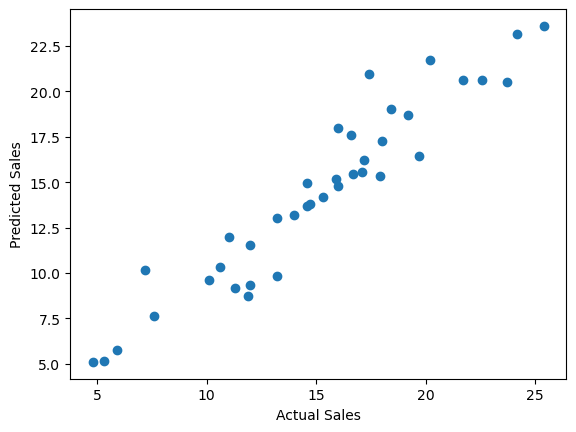

In [28]:
import dask.dataframe as dd
import dask_ml.linear_model as lm
from dask_ml.model_selection import train_test_split
from dask_ml.metrics import r2_score
import matplotlib.pyplot as plt

# Read the CSV file in chunks using Dask
df = dd.read_csv(r'C:\Users\user\Downloads\archive (7)\advertising.csv')

# Filter rows with non-null values in the specified columns
df = df[df['TV'].notnull() & df['Radio'].notnull() & df['Newspaper'].notnull()]

# Split the dataset into features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert Dask dataframes to Dask arrays
X_train_array = X_train.to_dask_array(lengths=True)
X_test_array = X_test.to_dask_array(lengths=True)
y_train_array = y_train.to_dask_array(lengths=True)
y_test_array = y_test.to_dask_array(lengths=True)

# Train the linear regression model
model = lm.LinearRegression()
model.fit(X_train_array, y_train_array)

# Make predictions on the test set
y_pred = model.predict(X_test_array)

# Calculate the R-squared score
r2 = r2_score(y_test_array, y_pred)

# Visualize the predicted vs. actual sales
plt.scatter(y_test_array.compute(), y_pred.compute())
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
